# Churn de Consumidores em um Banco

O churn é um fenômeno crucial e de grande relevância que se refere à métrica utilizada para mostrar o número de clientes que cancelam um serviço em um determinado período de tempo. Compreender e prever o churn é de extrema importância para as instituições, pois a retenção de clientes é fundamental para o crescimento e a lucratividade a longo prazo.

Neste contexto, o objetivo do projeto é explorar os principais fatores que influenciam o churn de consumidores em um banco, utilizando técnicas analíticas para identificar padrões, tendências e insights significativos nos dados disponíveis. Serão adotadas abordagens de análise preditiva para desenvolver modelos que possam prever o churn dos clientes, visando auxiliar os bancos na implementação de estratégias proativas de retenção. Além disso, será buscado identificar segmentos de clientes com maior propensão ao churn, possibilitando a personalização de abordagens e ações direcionadas.

A aplicação de técnicas de ciência de dados nesse contexto não apenas oferece insights valiosos sobre o comportamento dos clientes, mas também pode contribuir significativamente para a formulação de estratégias mais eficazes de retenção, elevando a satisfação do cliente e fortalecendo a posição competitiva das instituições bancárias.

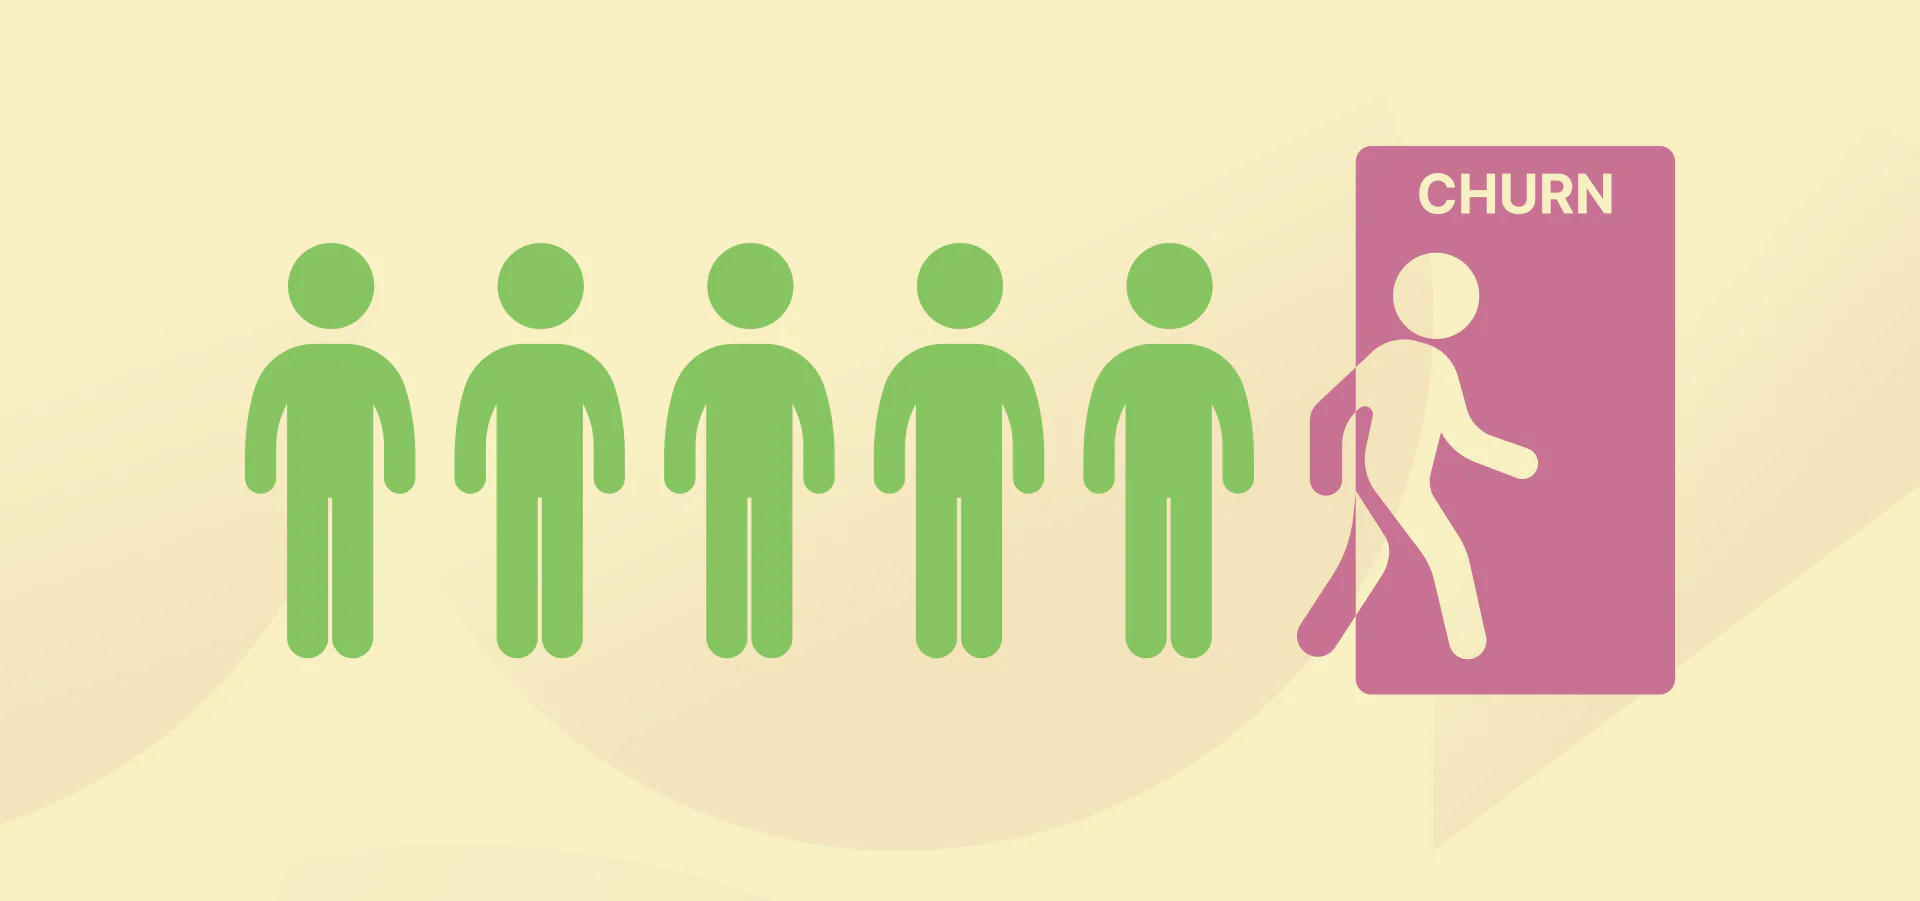

## Objetivos:

Usando dados públicos de um Banco no Site Kaggle, o objetivo principal foi a construção de um algoritmo de Machine Learning para classificar um cliente em churn ou não. Com base nisso, o algoritmo foi desenvolvido para antecipar a possível ocorrência de churn, permitindo que a empresa busque recuperar o cliente antes que ele decida encerrar sua relação com a empresa.

## Variáveis:

Antes de iniciar o projeto, estas são as variáveis presente no banco de dados e o seus significados.

- customer_id : Account Number / Número da conta

- credit_score : Credit Score / Pontuação de Crédito

- country : Country of Residence / País de Residência

- gender : Sex / Gênero

- age : Age / Idade

- tenure : From how many years he/she is having bank acc in ABC Bank? / A partir de quantos anos ele-ela possui conta no Banco ABC?

- balance : Account Balance / Salto da Conta

- products_number : Number of Product from bank / Número do Produto do Banco

- credit_card : Is this customer have credit card ? / Este consumidor tem cartão de credito?

- active_member : Is he/she is active Member of bank ? / Ele ou ela é um membro ativo do banco?

- estimated_salary : Estimated Salary / Estimativa de Salário

- churn : 1 - If the client has left the bank during some period or 
0 - if he or she has not / 1 - Se o cliente tenha saído do banco durante algum periodo ou 0 - se o cliente não tenha saído

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date, datetime
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import warnings

sns.set_style('darkgrid')
cor = 'palevioletred'
cores = ['wheat','yellowgreen']
warnings.filterwarnings('ignore')

## Importando e Verificando os Dados

Nesta etapa, será feita a exploração do conjunto de dados para compreendê-lo melhor e analisá-lo, a fim de identificar possíveis linhas duplicadas ou valores nulos que possam prejudicar a análise.

In [2]:
# Importando a Base de Dados
df = pd.read_csv(r'Bank Customer Churn Prediction.csv')

In [3]:
# Verificando a Base de Dados
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Verificando a quantidade de linhas e colunas
df.shape

(10000, 12)

In [5]:
# Verificando algumas estatísticas 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [6]:
# Observando se há linha duplicada
df[df.duplicated()]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [7]:
# Observando se há valor nulo
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Após a análise do banco de dados, foi constatado que a coluna "Customer_Id" não contribuirá significativamente para as análises e para o funcionamento do algoritmo. Como resultado, decidiu-se remove-la do banco de dados.

In [8]:
# Deletando a coluna Customer_id
del df["customer_id"]

## Análise Exploratória dos Dados

Após importar a base de dados e fazer algumas verificações, agora vamos fazer uma Análise Exploratória dos Dados, afim de fazer uma análise um pouco mais profunda que a anterior para descobrir como os dados se comportam entre si. Para isso, serão utilizados alguns gráficos

In [9]:
# Relembrando as variáveis
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


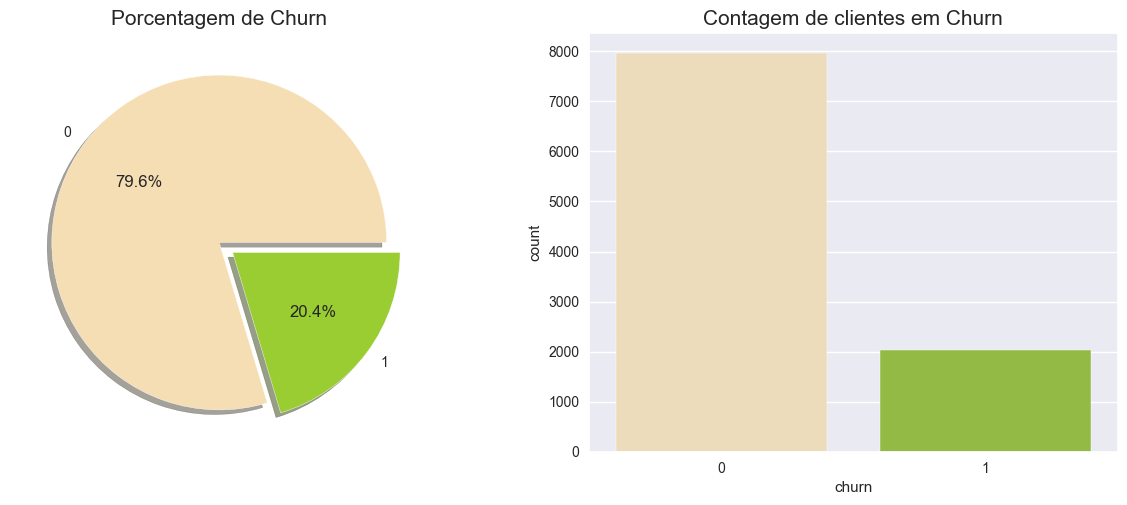

In [10]:
# Gráfico para saber a quantidade de clientes que estão em Churn(1) e os que não estão em Churn(0)
valores = df['churn'].value_counts()
plt.figure(figsize = (15,25))

plt.subplot(4,2,1)
plt.pie(valores,  labels = valores.index,colors =cores, autopct = '%1.1f%%',shadow = True, explode = (0,0.10))
plt.title("Porcentagem de Churn",fontsize = 15)

plt.subplot(4,2,2)
sns.countplot(x = df['churn'],palette=cores).set_title('Contagem de clientes em Churn',fontdict = { 'fontsize': 15});

A razão de churn é de 1 para 5, o que significa que, proporcionalmente, a cada **5 clientes, um está em churn**.

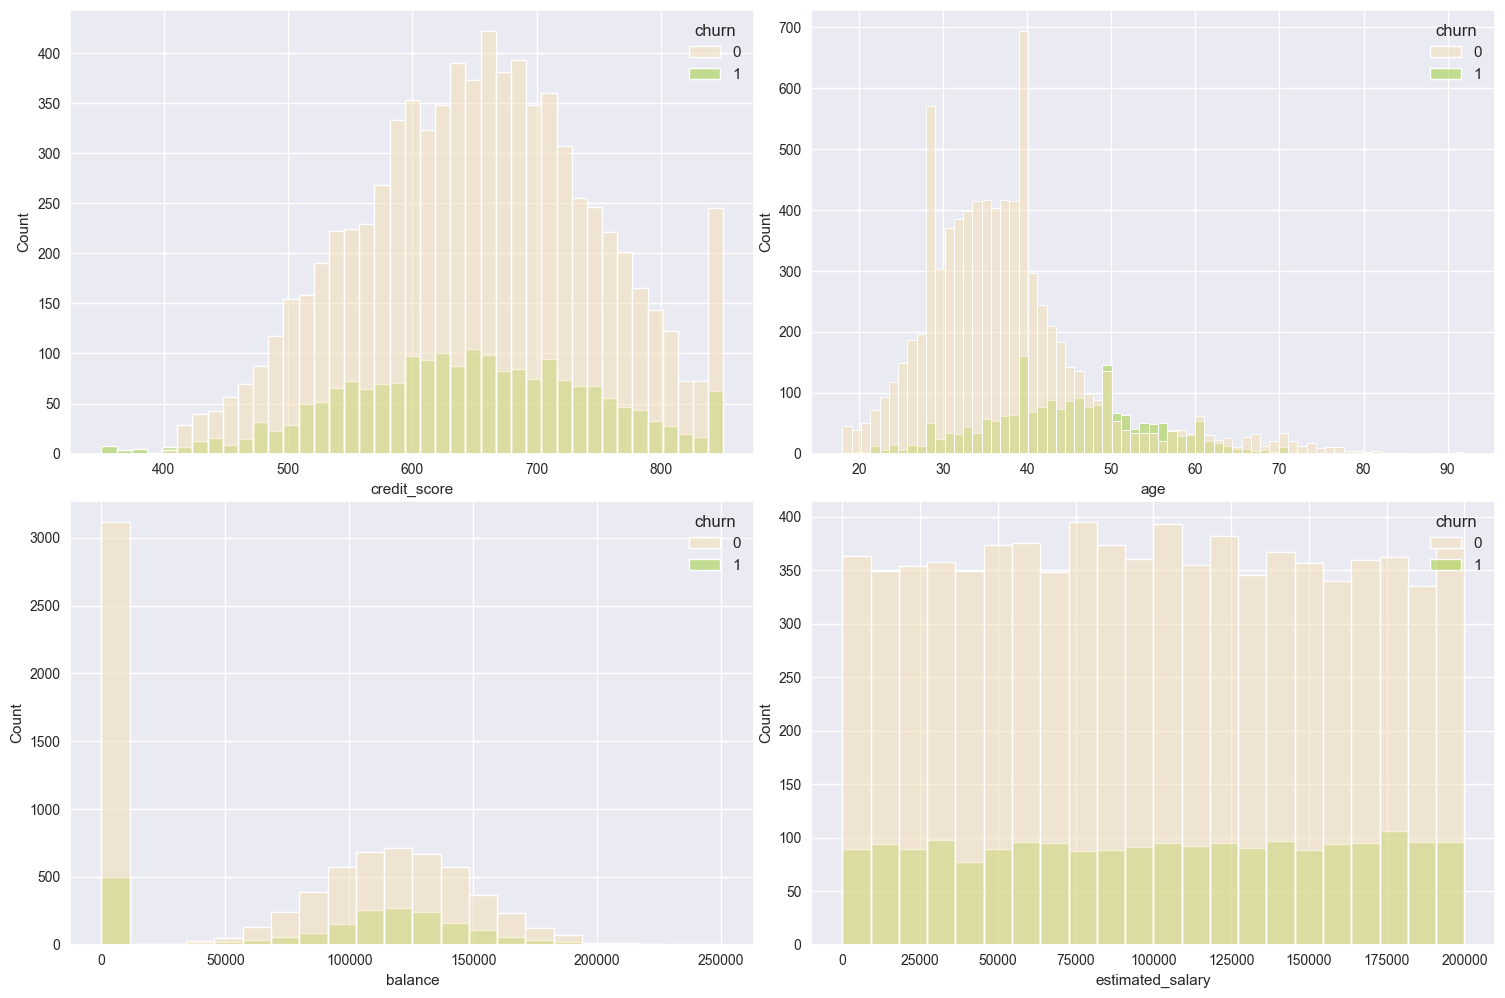

In [11]:
# Gráficos de acordo para verificar a distribuição de churn e não churn de acordo com as variáveis quantitativas
janela, graficos = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout()

sns.set_theme(style="ticks")
sns.histplot(data = df, x = 'credit_score',hue = 'churn',ax=graficos[0][0],palette=cores)
sns.histplot(data = df, x = 'age',hue = 'churn',ax=graficos[0][1],palette=cores)
sns.histplot(data = df, x = 'balance',hue = 'churn',ax=graficos[1][0],palette=cores)
sns.histplot(data = df, x = 'estimated_salary',hue = 'churn',ax=graficos[1][1],palette=cores);

Aqui está a representação da distribuição de cada variável.

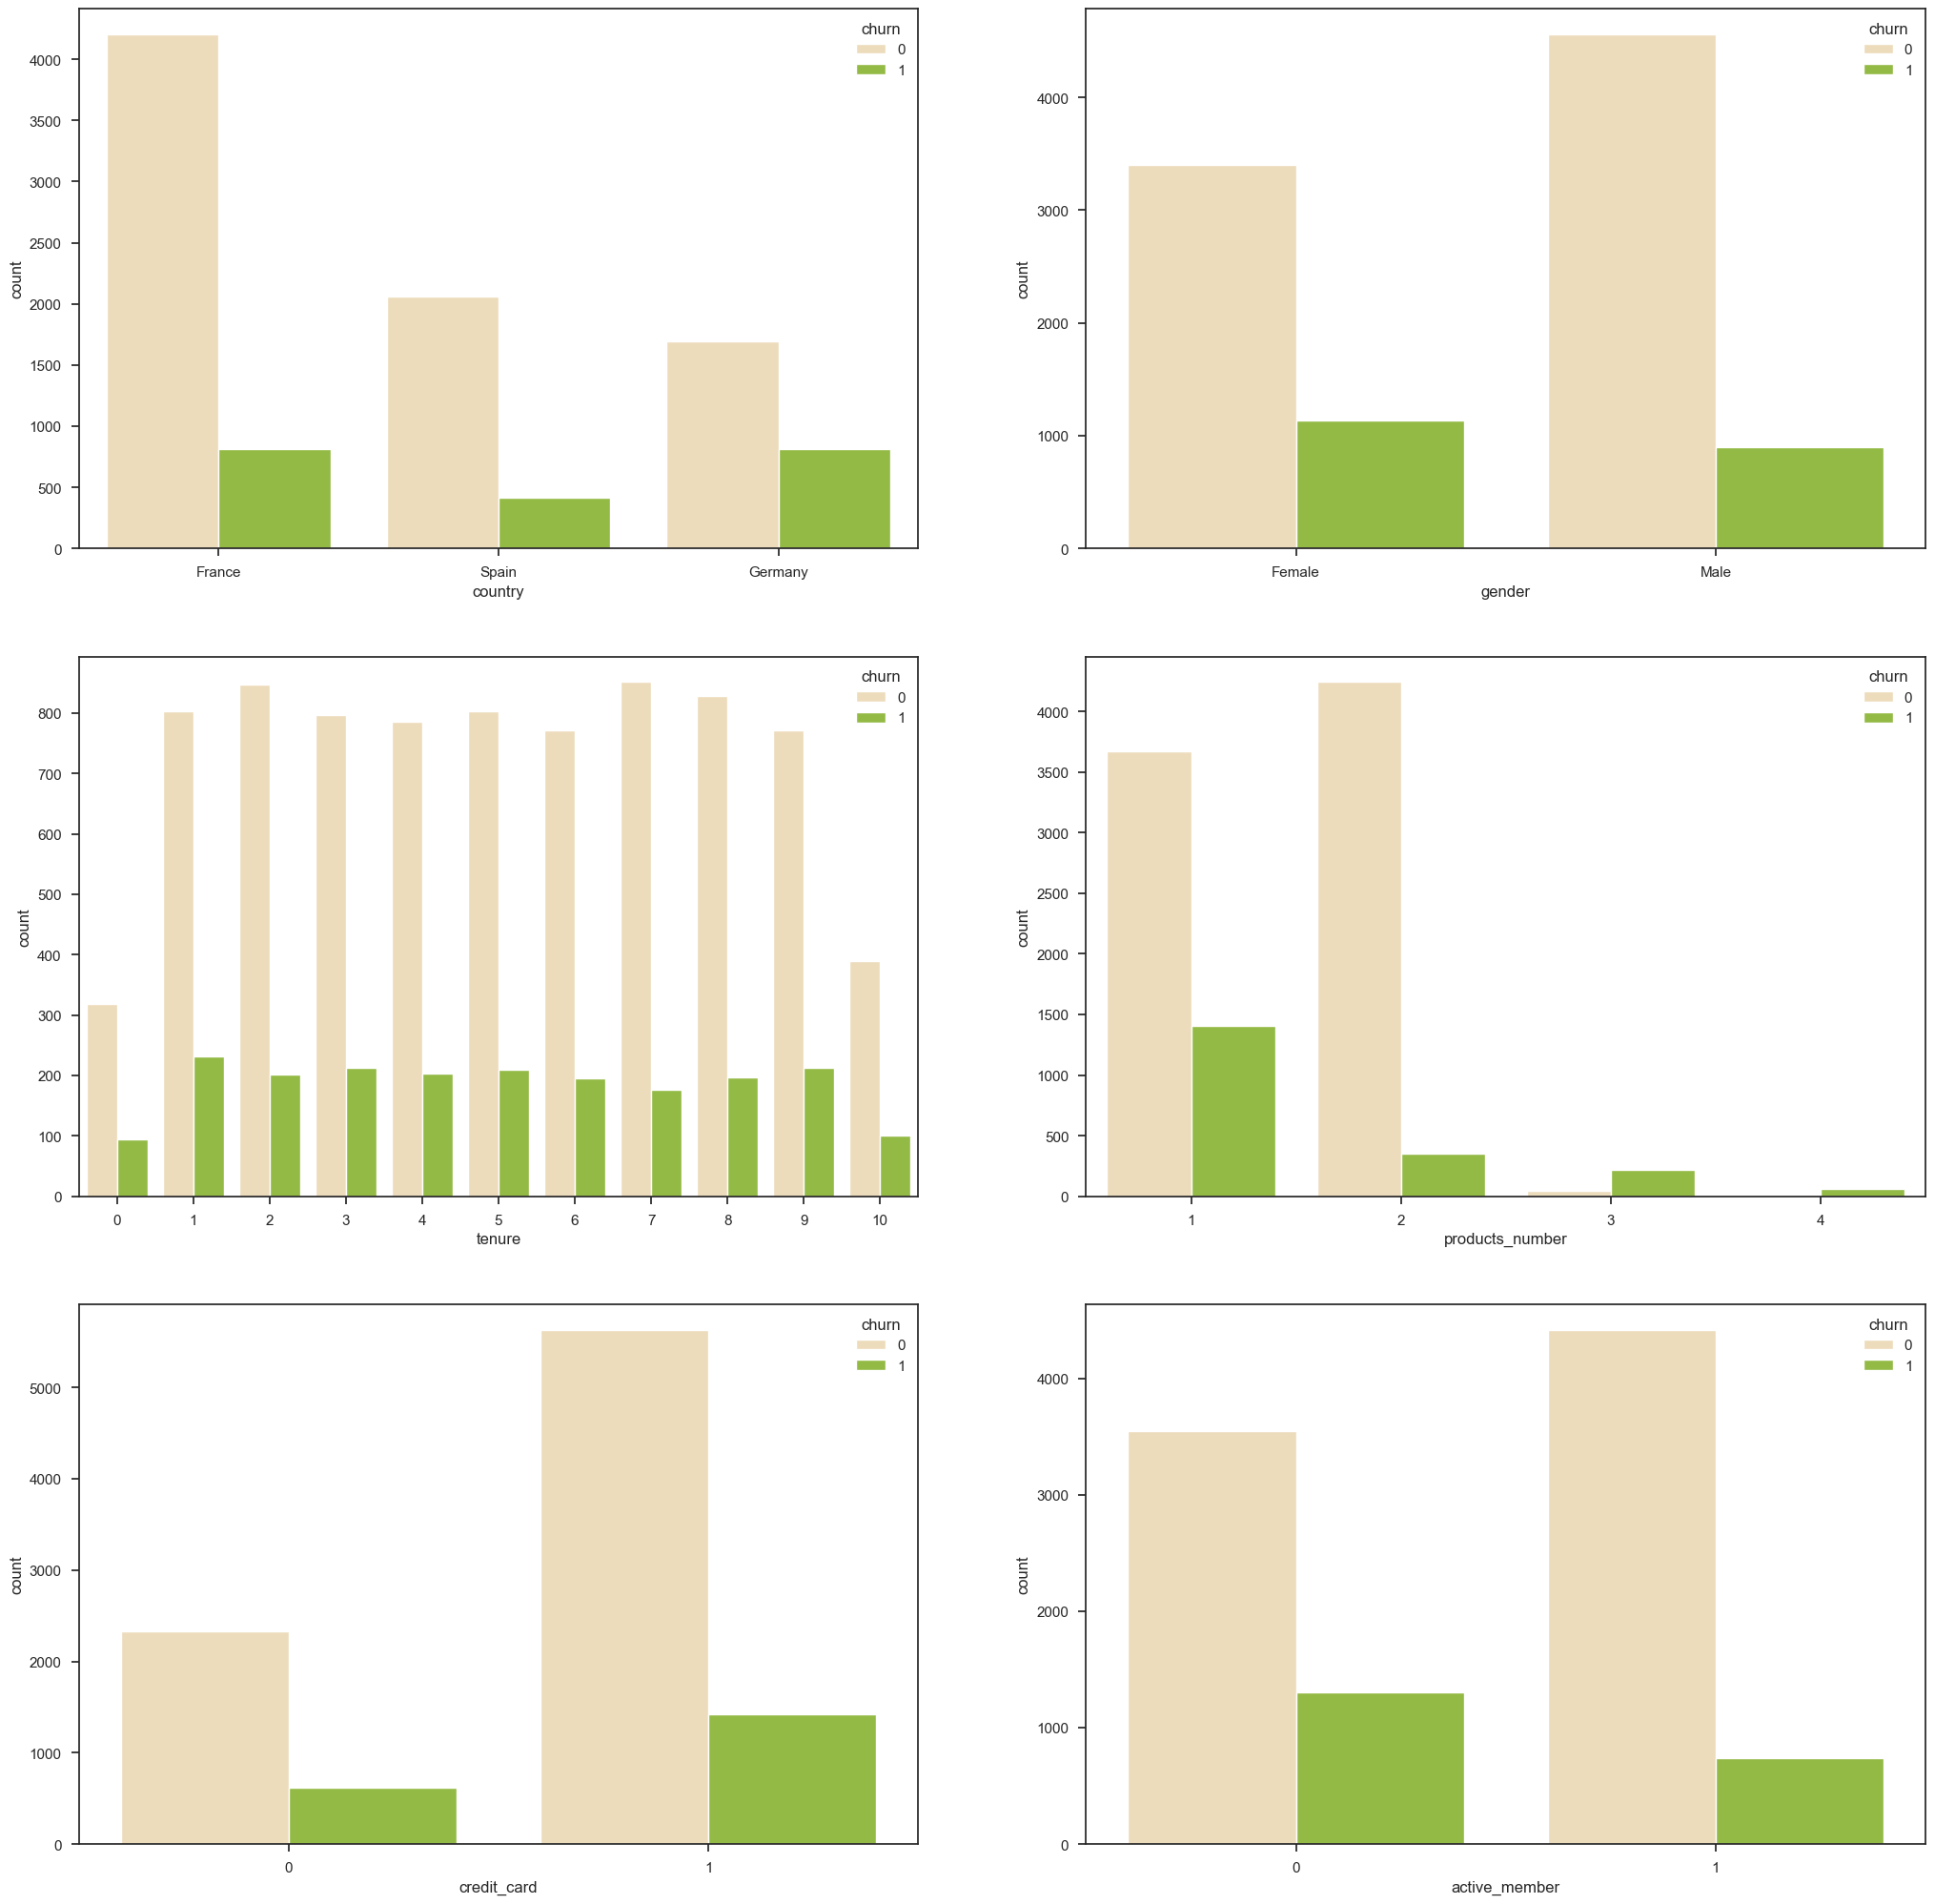

In [12]:
# Gráficos de acordo para verificar a distribuição de churn e não churn de acordo com as variáveis qualitativas
janela, graficos = plt.subplots(nrows=3, ncols=2, figsize=(25,25))

sns.countplot(x = 'country', data = df,palette=cores,hue = 'churn',ax=graficos[0][0])
sns.countplot(x = 'gender',  data = df,palette=cores,hue = 'churn',ax=graficos[0][1])
sns.countplot(x = 'tenure',  data = df,palette=cores,hue = 'churn',ax=graficos[1][0])
sns.countplot(x = 'products_number',  data = df,palette=cores,hue = 'churn',ax=graficos[1][1])
sns.countplot(x = 'credit_card',  data = df,palette=cores,hue = 'churn',ax=graficos[2][0])
sns.countplot(x = 'active_member', data = df,palette=cores,hue = 'churn',ax=graficos[2][1]);


<Axes: >

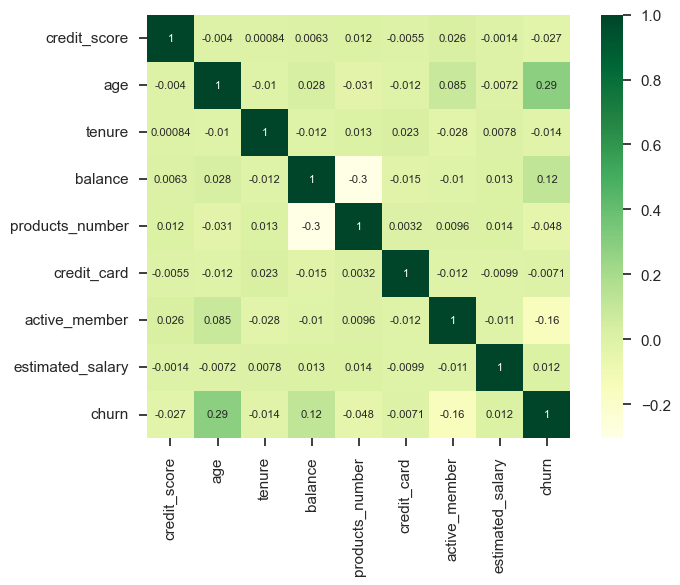

In [13]:
# Criando um gráfico para verificar a correlação das varíaveis
sns.heatmap(df.corr(),annot = True,annot_kws={"size": 8}, cmap= 'YlGn',square=True)

De acordo com o gráfico, pode-se concluir que as variáveis mais correlacionadas com o Churn são **Age (Idade)** e **Balance (Saldo)**. No entanto, essa correlação é identificada como fraca.

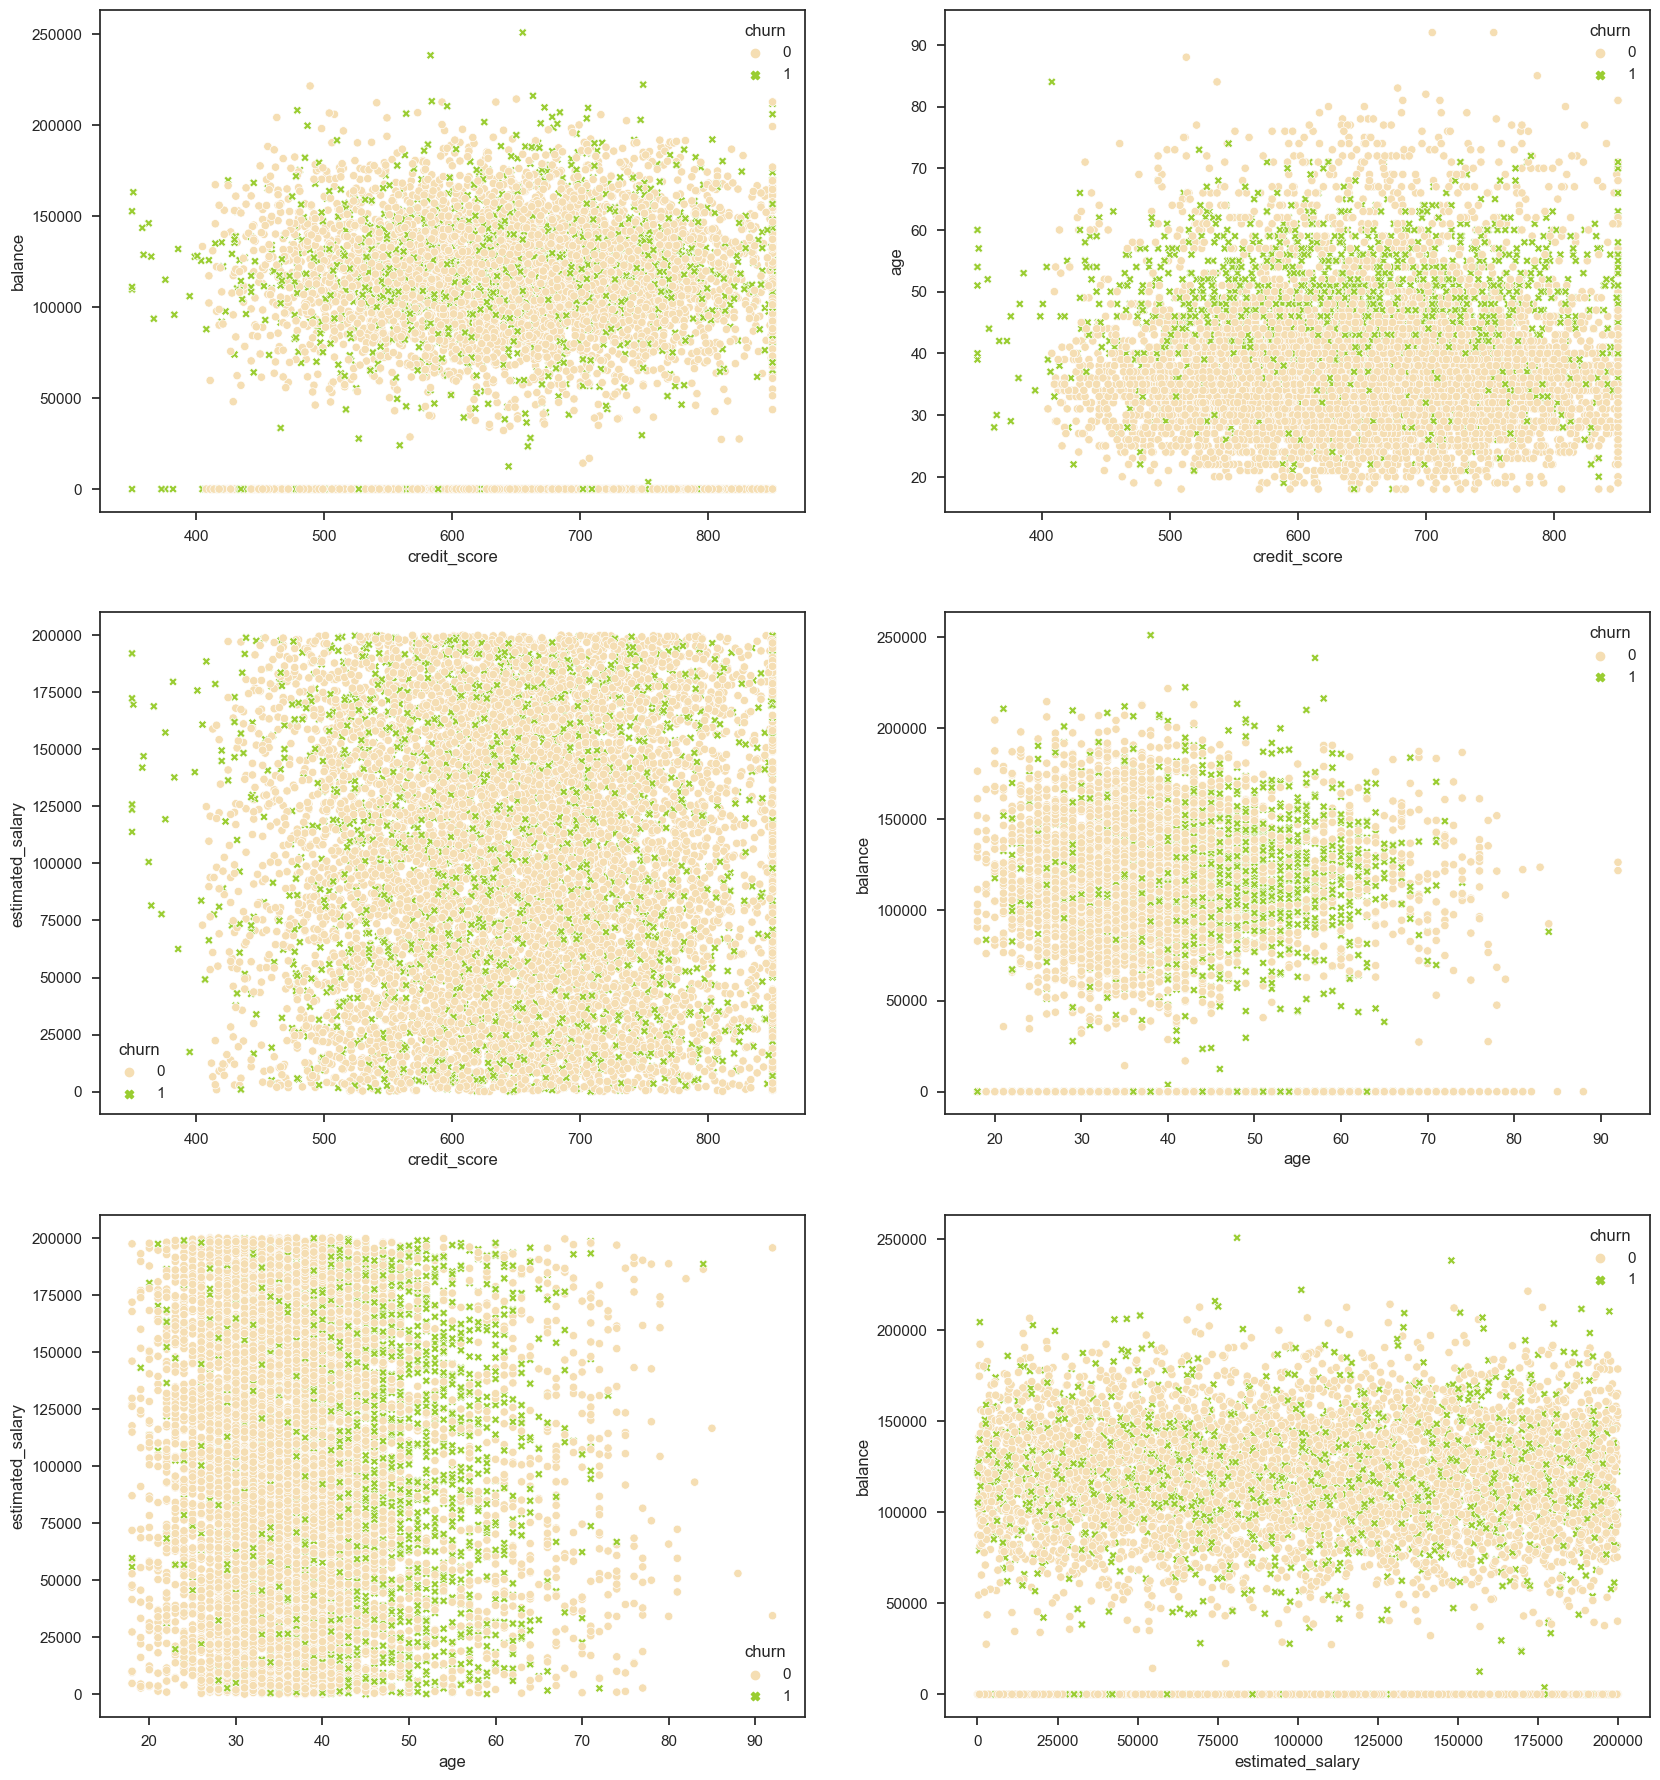

In [14]:
# Criando um gráfico para verificar a dispensão das varíaveis
plt.figure(figsize = (20,30))

plt.subplot(4,2,1)
sns.scatterplot(x = "credit_score", y = "balance", hue = "churn",style = 'churn', data = df, palette = cores)

plt.subplot(4,2,2)
sns.scatterplot(x = "credit_score", y = "age", hue = "churn",style = 'churn', data = df, palette = cores)

plt.subplot(4,2,3)
sns.scatterplot(x = "credit_score", y = "estimated_salary", hue = "churn",style = 'churn', data = df, palette = cores)

plt.subplot(4,2,4)
sns.scatterplot(x = "age", y = "balance", hue = "churn",style = 'churn', data = df, palette = cores)

plt.subplot(4,2,5)
sns.scatterplot(x = "age", y = "estimated_salary", hue = "churn",style = 'churn', data = df, palette = cores)

plt.subplot(4,2,6)
sns.scatterplot(x = "estimated_salary", y = "balance", hue = "churn",style = 'churn', data = df, palette = cores);


Como visto no heatmap, as variáveis quantitativas não apresentam correlação significativa, ou seja, não há uma relação linear forte entre elas.

## Dividindo a base de dados

Para a criação do algoritmo, será realizada a divisão da base de dados em duas partes: x, composta pelas variáveis que auxiliarão na previsão do churn, e y, representando o próprio churn que se busca identificar.

In [15]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Dividindo a Base de Dados
x = df.iloc[:, :10].values 
y = df.iloc[:, 10].values

In [17]:
# Escolhendo amostras aleatoriamente com reposição
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=0)
x, y = os.fit_resample(x, y)
x,y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [565, 'Germany', 'Male', ..., 1, 0, 175070.94],
        [553, 'Spain', 'Female', ..., 0, 1, 30730.95],
        [492, 'France', 'Female', ..., 1, 1, 182865.09]], dtype=object),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64))

# Tratando de atributos categóricos

Para o algoritmo, é necessário o tratamento dos dados categóricos, como por exemplo, "country" e "gender", convertendo-os em variáveis quantitativas antes de serem empregados no modelo

In [18]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# Transformando as variáveis
from sklearn.preprocessing import LabelEncoder
label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()


x[:,1] = label_encoder_country.fit_transform(x[:,1])
x[:,2] = label_encoder_gender.fit_transform(x[:,2])

In [20]:
# Mostrando como ficou nossas variáveis
x[0]

array([619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

# Padronizando a base de dados

A partir de agora, será utilizada uma nova base de dados denominada "X_scaler". Esta foi criada a partir de uma padronização, com o objetivo de evitar que o algoritmo assuma a relevância de um número sobre o outro. Por exemplo, na variável gênero, temos 0 (Feminino) e 1 (Masculino). A padronização foi realizada para prevenir que o algoritmo considere o número 1 como melhor que o 0, ou vice-versa.

In [21]:
# Padronização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [22]:
# Verificando como ficou a nova base de dados
x_scaler[0]

array([-0.29877723, -0.95773012, -1.01799435,  0.08418894, -1.01840607,
       -1.33103279, -0.75606167,  0.6512495 ,  1.08223556,  0.00817382])

## Separando a Base de Treinamento e de Teste

Agora, serão separadas as bases de dados em conjuntos de treinamento e teste. O conjunto de treinamento conterá 75% dos dados, enquanto o conjunto de teste conterá os 25% restantes. Este procedimento será realizado tanto na base de dados original quanto na base de dados que foi previamente padronizada.

In [23]:
# Separando as bases de dados
from sklearn.model_selection import train_test_split
x_treinamento, x_teste,y_treinamento,  y_teste = train_test_split(x,y, test_size = 0.25,random_state = 42)
x_scaler_treinamento,x_scaler_teste,y_scaler_treinamento,  y_scaler_teste = train_test_split(x_scaler,y, test_size = 0.25,random_state = 42)

In [24]:
# Verificando a quantidade de linha e coluna da base de treinamento normal
x_treinamento.shape, y_treinamento.shape

((11944, 10), (11944,))

In [25]:
# Verificando a quantidade de linha e coluna da base de teste normal
x_teste.shape, y_teste.shape

((3982, 10), (3982,))

In [26]:
# Verificando a quantidade de linha e coluna da base de treinamento padronizada
x_scaler_treinamento.shape, y_scaler_treinamento.shape

((11944, 10), (11944,))

In [27]:
# Verificando a quantidade de linha e coluna da base de teste padronizada
x_scaler_teste.shape, y_scaler_teste.shape

((3982, 10), (3982,))

In [28]:
# Diferença entre a base de dados normal e padronizada
x_treinamento[0], x_scaler_treinamento[0]

(array([610, 1, 1, 50, 1, 113957.01, 2, 1, 0, 196526.55], dtype=object),
 array([-0.39009988,  0.29383383,  0.98232373,  0.84031081, -1.36135608,
         0.5229727 ,  0.72627714,  0.6512495 , -0.92401325,  1.66148209]))

# Treinando os modelos

Neste momento, modelos serão aplicados à base de dados de treinamento

## Naive Bayes

### Base de Dados Normal

In [29]:
# Treinando o algoritmo com a base normal
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento,y_treinamento)

GaussianNB()

In [30]:
# Verificando qual é a previsão do meu algoritmo
previsoes_naive = naive_bayes.predict(x_teste)
previsoes_naive

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [31]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
# Precisão do algoritmo
accuracy_naive = accuracy_score(y_teste,previsoes_naive)
accuracy_naive

0.6911099949773983

0.6911099949773983

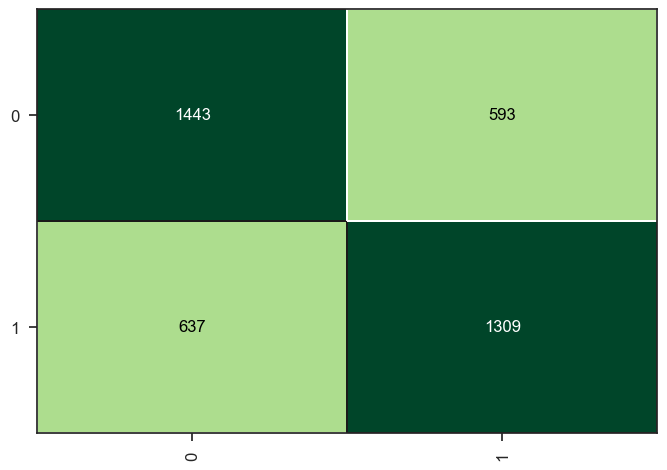

In [33]:
# Matriz de Confusão do Algoritmo
cm_naive = ConfusionMatrix(naive_bayes, cmap = 'YlGn')
cm_naive.fit(x_treinamento,y_treinamento)
cm_naive.score(x_teste,y_teste)

In [34]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_naive))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2036
           1       0.69      0.67      0.68      1946

    accuracy                           0.69      3982
   macro avg       0.69      0.69      0.69      3982
weighted avg       0.69      0.69      0.69      3982



### Base de Dados Padronizada

In [35]:
# Treinando o algoritmo com a base padronizada
naive_bayes_scaler = GaussianNB()
naive_bayes_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

GaussianNB()

In [36]:
# Verificando qual é a previsão do meu algoritmo
previsoes_naive_scaler = naive_bayes_scaler.predict(x_scaler_teste)
previsoes_naive_scaler

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [37]:
# Verificando quais são os resultados reais
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [38]:
# Precisão do algoritmo
accuracy_naive_scaler = accuracy_score(y_scaler_teste,previsoes_naive_scaler)
accuracy_naive_scaler

0.735811150175791

0.735811150175791

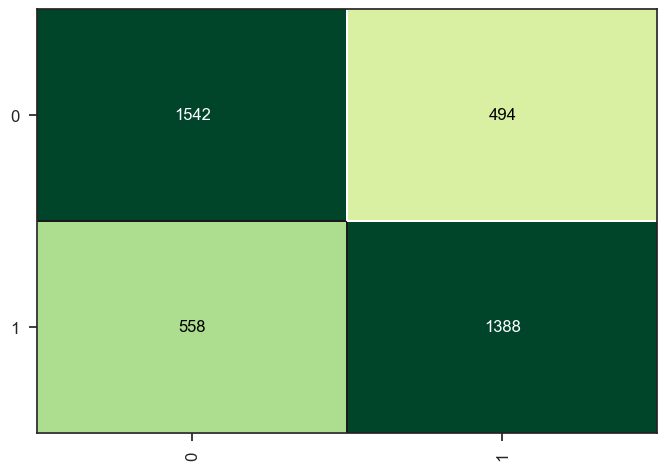

In [39]:
# Matriz de Confusão do Algoritmo
cm_naive = ConfusionMatrix(naive_bayes_scaler, cmap = 'YlGn')
cm_naive.fit(x_scaler_treinamento,y_scaler_treinamento)
cm_naive.score(x_scaler_teste,y_scaler_teste)

In [40]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_naive_scaler))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      2036
           1       0.74      0.71      0.73      1946

    accuracy                           0.74      3982
   macro avg       0.74      0.74      0.74      3982
weighted avg       0.74      0.74      0.74      3982



## Random Forest

### Base de Dados Normal

In [41]:
# Treinando o algoritmo com a base normal
random_forest = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 40)
random_forest.fit(x_treinamento,y_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [42]:
# Verificando qual é a previsão do meu algoritmo
previsoes_random_forest = random_forest.predict(x_teste)
previsoes_random_forest

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [43]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [44]:
# Precisão do algoritmo
accuracy_random_forest = accuracy_score(y_teste,previsoes_random_forest)
accuracy_random_forest

0.9367152184831743

0.9367152184831743

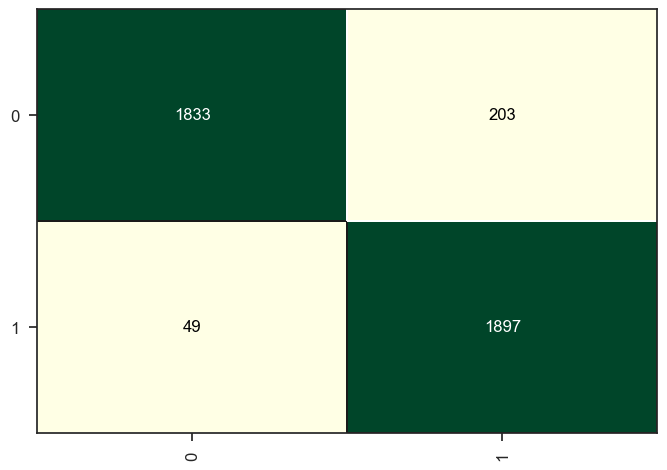

In [45]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(random_forest, cmap = 'YlGn')
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

In [46]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_random_forest))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      2036
           1       0.90      0.97      0.94      1946

    accuracy                           0.94      3982
   macro avg       0.94      0.94      0.94      3982
weighted avg       0.94      0.94      0.94      3982



### Base de Dados Padronizada

In [47]:
# Treinando o algoritmo com a base normal
random_forest_scaler = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
random_forest_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

RandomForestClassifier(n_estimators=150)

In [48]:
# Verificando qual é a previsão do meu algoritmo
previsoes_random_forest_scaler = random_forest_scaler.predict(x_scaler_teste)
previsoes_random_forest_scaler

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [49]:
# Verificando quais são os resultados reais
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [50]:
# Matriz de Confusão do Algoritmo
accuracy_random_forest_scaler = accuracy_score(y_scaler_teste,previsoes_random_forest_scaler)
accuracy_random_forest_scaler

0.9445002511300854

0.9445002511300854

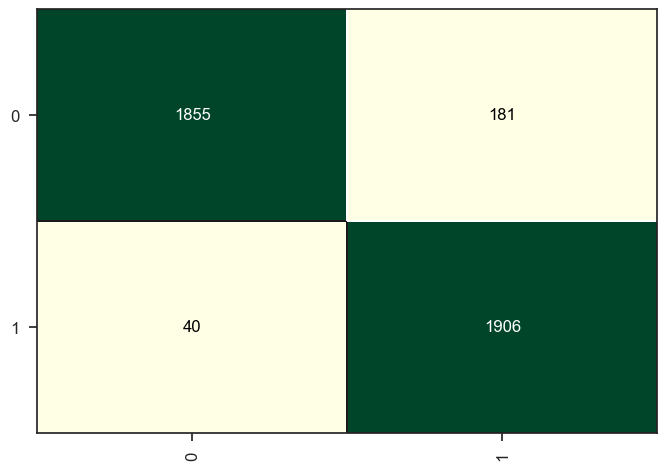

In [51]:
# Matriz de Confusão do Algoritmo
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_scaler, cmap = 'YlGn')
cm.fit(x_scaler_treinamento,y_scaler_treinamento)
cm.score(x_scaler_teste,y_scaler_teste)

In [52]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_random_forest_scaler))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2036
           1       0.91      0.98      0.95      1946

    accuracy                           0.94      3982
   macro avg       0.95      0.95      0.94      3982
weighted avg       0.95      0.94      0.94      3982



## KNN

### Base de Dados Normal

In [53]:
# Treinando o algoritmo com a base normal
knn = KNeighborsClassifier(n_neighbors = 1, p = 1)
knn.fit(x_treinamento,y_treinamento)

KNeighborsClassifier(n_neighbors=1, p=1)

In [54]:
# Verificando qual é a previsão do meu algoritmo
previsoes_knn = knn.predict(x_teste)
previsoes_knn

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [55]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [56]:
# Precisão do algoritmo
accuracy_knn =accuracy_score(y_teste,previsoes_knn)
accuracy_knn

0.8588648920140632

0.8588648920140632

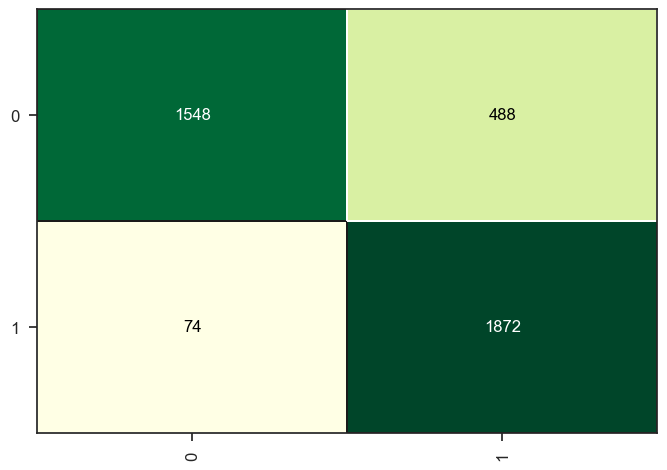

In [57]:
# Matriz de Confusão do Algoritmo
MatrixConfusao = ConfusionMatrix(knn, cmap = 'YlGn')
MatrixConfusao.fit(x_treinamento,y_treinamento)
MatrixConfusao.score(x_teste,y_teste)

In [58]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_knn))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      2036
           1       0.79      0.96      0.87      1946

    accuracy                           0.86      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.88      0.86      0.86      3982



### Base de Dados Padronizada

In [59]:
# Treinando o algoritmo com a base padronizada
knn_scaler = KNeighborsClassifier(n_neighbors = 1, p = 1)
knn_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

KNeighborsClassifier(n_neighbors=1, p=1)

In [60]:
# Verificando qual é a previsão do meu algoritmo
previsoes_knn_scaler = knn_scaler.predict(x_scaler_teste)
previsoes_knn_scaler

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [61]:
# Verificando quais são os resultados reais
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [62]:
# Precisão do algoritmo
accuracy_knn_scaler = accuracy_score(y_scaler_teste,previsoes_knn_scaler)
accuracy_knn_scaler

0.9131089904570567

0.9131089904570567

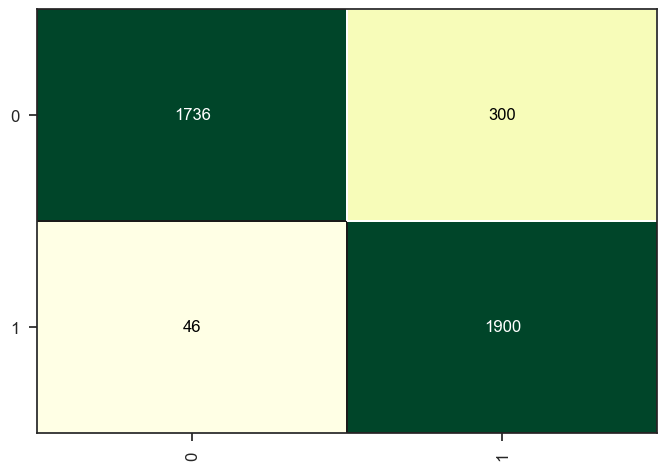

In [63]:
# Matriz de Confusão do Algoritmo
MatrixConfusao = ConfusionMatrix(knn_scaler, cmap = 'YlGn')
MatrixConfusao.fit(x_scaler_treinamento,y_scaler_treinamento)
MatrixConfusao.score(x_scaler_teste,y_scaler_teste)

In [64]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_knn_scaler))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2036
           1       0.86      0.98      0.92      1946

    accuracy                           0.91      3982
   macro avg       0.92      0.91      0.91      3982
weighted avg       0.92      0.91      0.91      3982



## Regressão Logistica

### Base de Dados Normal

In [65]:
# Treinando o algoritmo com a base normal
regressão_logistica = LogisticRegression(C = 1.0, solver= 'lbfgs', tol= 0.0001)
regressão_logistica.fit(x_treinamento,y_treinamento)

LogisticRegression()

In [66]:
# Verificando qual é a previsão do meu algoritmo
previsoes_rl = regressão_logistica.predict(x_teste)
previsoes_rl

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [67]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [68]:
# Precisão do algoritmo
accuracy_regressão = accuracy_score(y_teste,previsoes_rl)
accuracy_regressão

0.6499246609743847

0.6499246609743847

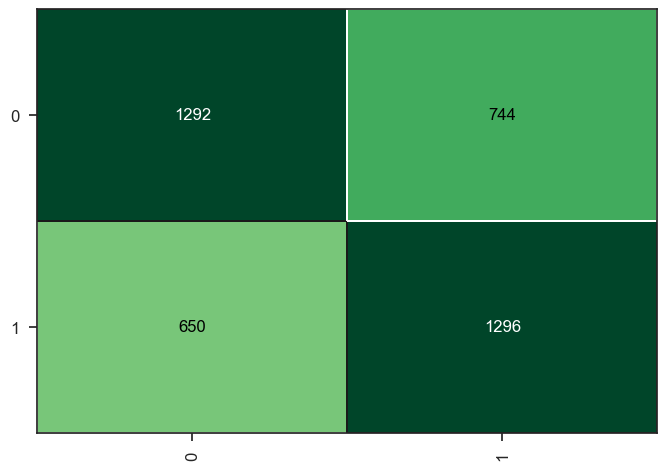

In [69]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(regressão_logistica, cmap = 'YlGn')
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

In [70]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_rl))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      2036
           1       0.64      0.67      0.65      1946

    accuracy                           0.65      3982
   macro avg       0.65      0.65      0.65      3982
weighted avg       0.65      0.65      0.65      3982



### Base de Dados Padronizada

In [71]:
# Treinando o algoritmo com a base padronizada
regressão_logistica_scaler = LogisticRegression(C = 1.0, solver= 'saga', tol= 0.0001)
regressão_logistica_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

LogisticRegression(solver='saga')

In [72]:
# Verificando qual é a previsão do meu algoritmo
previsoes_rl_scaler = regressão_logistica_scaler.predict(x_scaler_teste)
previsoes_rl_scaler

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [73]:
# Precisão do algoritmo
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [74]:
accuracy_regressão_scaler = accuracy_score(y_scaler_teste,previsoes_rl_scaler)
accuracy_regressão_scaler

0.6916122551481667

0.6916122551481667

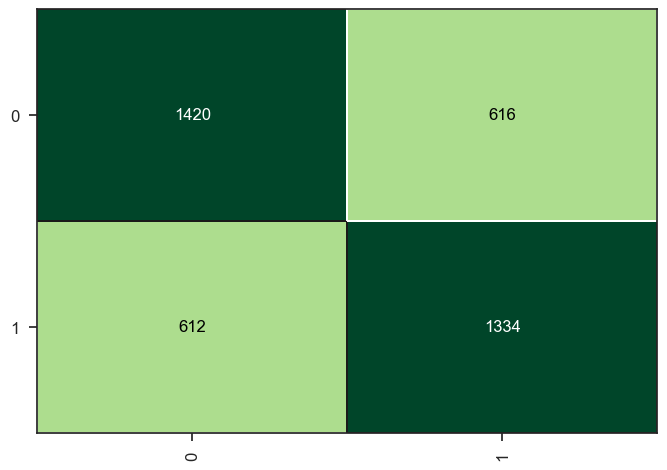

In [75]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(regressão_logistica_scaler, cmap = 'YlGn')
cm.fit(x_scaler_treinamento,y_scaler_treinamento)
cm.score(x_scaler_teste,y_scaler_teste)

In [76]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_rl_scaler))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2036
           1       0.68      0.69      0.68      1946

    accuracy                           0.69      3982
   macro avg       0.69      0.69      0.69      3982
weighted avg       0.69      0.69      0.69      3982



## Redes Neurais

### Base de Dados Normal

In [77]:
# Treinando o algoritmo com a base normal
redes_neurais = MLPClassifier(activation= 'relu', batch_size= 56, max_iter=1000, solver= 'adam')
redes_neurais.fit(x_treinamento,y_treinamento)

MLPClassifier(batch_size=56, max_iter=1000)

In [78]:
# Verificando qual é a previsão do meu algoritmo
previsoes_redes = redes_neurais.predict(x_teste)
previsoes_redes

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [79]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [80]:
# Precisão do algoritmo
accuracy_redes = accuracy_score(y_teste,previsoes_redes)
accuracy_redes

0.5502260170768458

0.5502260170768458

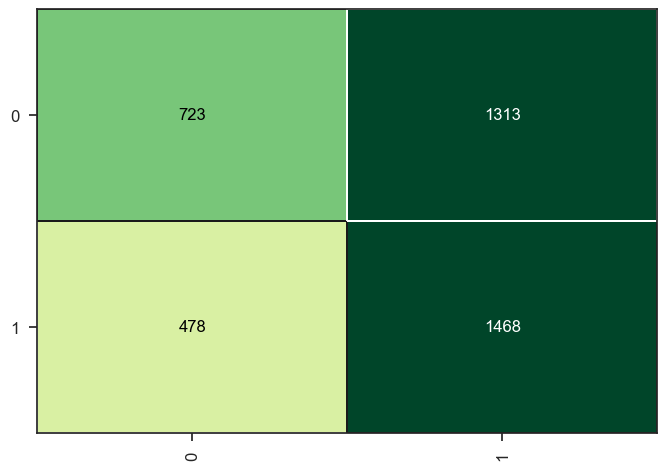

In [81]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(redes_neurais, cmap = 'YlGn')
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

In [82]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_redes))

              precision    recall  f1-score   support

           0       0.60      0.36      0.45      2036
           1       0.53      0.75      0.62      1946

    accuracy                           0.55      3982
   macro avg       0.56      0.55      0.53      3982
weighted avg       0.57      0.55      0.53      3982



## Base de Dados Padronizada

In [83]:
# Treinando o algoritmo com a base padronizada
redes_neurais_scaler = MLPClassifier(activation= 'relu', batch_size= 56, max_iter=1000, solver= 'adam')
redes_neurais_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

MLPClassifier(batch_size=56, max_iter=1000)

In [84]:
# Verificando qual é a previsão do meu algoritmo
previsoes_redes_scaler = redes_neurais_scaler.predict(x_scaler_teste)
previsoes_redes_scaler

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [85]:
# Verificando quais são os resultados reais
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [86]:
# Precisão do algoritmo
accuracy_redes_scaler = accuracy_score(y_scaler_teste,previsoes_redes_scaler)
accuracy_redes_scaler

0.8144148669010548

0.8144148669010548

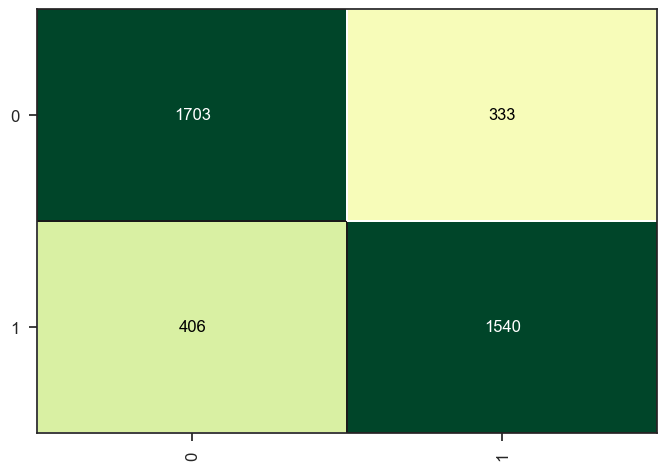

In [87]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(redes_neurais_scaler, cmap = 'YlGn')
cm.fit(x_scaler_treinamento,y_scaler_treinamento)
cm.score(x_scaler_teste,y_scaler_teste)


In [88]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_redes_scaler))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2036
           1       0.82      0.79      0.81      1946

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



Foram treinados cinco algoritmos distintos, sendo que cada um foi treinado com duas bases de dados diferentes: uma base normal e outra padronizada. Com o intuito de determinar qual delas ofereceria o melhor desempenho, a base padronizada foi a selecionada. Os algoritmos escolhidos foram: Random Forest, KNN e Redes Neurais. Eles foram escolhidos não apenas por sua alta acurácia, mas também por apresentarem boa precisão, recall e pontuação F1 score.

## Avaliando Algoritmos


A avaliação de modelo é o processo de verificar o desempenho de um algoritmo ou modelo estatístico usando dados separados não utilizados no treinamento. Ela determina quão bem o modelo faz previsões ou toma decisões com base em novos dados. Métricas como precisão, acurácia e erro são usadas para medir o quão bem o modelo generaliza para situações não vistas durante o treinamento. É fundamental para garantir que o modelo funcione bem na prática.

In [89]:
# Criando uma tabela com os algoritmos e a sua precisão
Algoritmos = pd.DataFrame({'Algoritmos': ['Naive Bayes','Naive Bayes Scaler',
                                          'Random Forest','Random Forest Scaler','KNN','KNN Scaler',
                                          'Regressão Logistica','Regressão Logistica Scaler',
                                          'Redes Neurais','Redes Neurais Scaler'],
                           'Accuracy': [accuracy_naive,accuracy_naive_scaler,
                                        accuracy_random_forest,accuracy_random_forest_scaler,
                                       accuracy_knn,accuracy_knn_scaler,
                                       accuracy_regressão,accuracy_regressão_scaler,
                                       accuracy_redes,accuracy_redes_scaler]
                           })
Algoritmos

,Algoritmos,Accuracy
0,Naive Bayes,0.691110
1,Naive Bayes Scaler,0.735811
2,Random Forest,0.936715
3,Random Forest Scaler,0.944500
4,KNN,0.858865
5,KNN Scaler,0.913109
6,Regressão Logistica,0.649925
7,Regressão Logistica Scaler,0.691612
8,Redes Neurais,0.550226
9,Redes Neurais Scaler,0.814415


Pode-se observar que os melhores algoritmos foram com as bases de dados padronizadas. Portanto, os algoritmos selecionados para utilização serão: **Random Forest Scaler**, **KNN Scaler** e **Redes Neurais Scaler**.

In [90]:
print('--------------Random Forest Scaler--------------\n')
print(classification_report(y_scaler_teste,previsoes_random_forest_scaler))

--------------Random Forest Scaler--------------

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2036
           1       0.91      0.98      0.95      1946

    accuracy                           0.94      3982
   macro avg       0.95      0.95      0.94      3982
weighted avg       0.95      0.94      0.94      3982



In [91]:
print('--------------KNN Scaler--------------\n')
print(classification_report(y_scaler_teste,previsoes_knn_scaler))

--------------KNN Scaler--------------

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2036
           1       0.86      0.98      0.92      1946

    accuracy                           0.91      3982
   macro avg       0.92      0.91      0.91      3982
weighted avg       0.92      0.91      0.91      3982



In [92]:
print('--------------Redes Neurais Scaler--------------\n')
print(classification_report(y_scaler_teste,previsoes_redes_scaler))

--------------Redes Neurais Scaler--------------

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2036
           1       0.82      0.79      0.81      1946

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



O modelo **Random Forest Scaler** demonstra maior precisão, uma vez que as taxas de falsos positivos e falsos negativos são superiores aos demais modelos.

# Validação

A validação de um algoritmo de machine learning é um processo crucial que busca avaliar o desempenho e a capacidade de generalização do modelo construído. Em resumo, consiste em verificar se o modelo é capaz de realizar previsões precisas e confiáveis em dados que não foram utilizados durante o treinamento, ou seja, em dados completamente novos. A validação que será utilizada é a Validação Cruzada.

In [93]:
# Criando listas vazias
scores_random_scaler = []
scores_knn_scaler  = []
scores_redes_scaler = []

In [94]:
# Refazendo os algoritmos para verificar como se comportam de acordo com o random state
from sklearn.model_selection import cross_val_score,KFold
for i in range(15):
    print(i)
    k = KFold(n_splits=10,shuffle=True,random_state=i)
    random_scaler = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
    scores = cross_val_score(random_scaler,x_scaler,y,cv= k)
    print(scores)
    print(scores.mean())
    scores_random_scaler.append(scores.mean())

0
[0.95731325 0.95794099 0.95480226 0.95919648 0.96045198 0.95982423
 0.95854271 0.95100503 0.95791457 0.96482412]
0.9581815622367961
1
[0.95480226 0.96359071 0.95291902 0.9648462  0.95919648 0.96296296
 0.95728643 0.95477387 0.95791457 0.96105528]
0.9589347790427339
2
[0.96296296 0.96107972 0.95605775 0.9566855  0.9566855  0.96672944
 0.95477387 0.95979899 0.95477387 0.95226131]
0.9581808919045951
3
[0.96045198 0.95731325 0.96170747 0.95856874 0.96986817 0.95605775
 0.95917085 0.96042714 0.95665829 0.96482412]
0.9605047759197747
4
[0.95480226 0.9648462  0.95480226 0.96421846 0.95982423 0.96296296
 0.95603015 0.95728643 0.95603015 0.96670854]
0.9597511648007773
5
[0.95982423 0.95794099 0.96045198 0.95794099 0.95982423 0.9566855
 0.96796482 0.95917085 0.96105528 0.9629397 ]
0.9603798575425779
6
[0.95605775 0.96107972 0.96547395 0.96107972 0.96045198 0.9566855
 0.96105528 0.96042714 0.95979899 0.96733668]
0.9609446715687667
7
[0.96045198 0.95543001 0.9566855  0.96421846 0.95417451 0.9478

In [95]:
# Refazendo os algoritmos para verificar como se comportam de acordo com o random state
for i in range(15):
    print(i)
    k = KFold(n_splits=10,shuffle=True,random_state=i)
    kn_scaler = KNeighborsClassifier(n_neighbors = 1, p = 1)
    scores = cross_val_score(knn_scaler,x_scaler,y,cv= k)
    print(scores)
    print(scores.mean())
    scores_knn_scaler.append(scores.mean())

0
[0.93596987 0.92655367 0.92027621 0.93785311 0.93345888 0.92906466
 0.93907035 0.92148241 0.94095477 0.93404523]
0.9318729160554813
1
[0.93157564 0.94036409 0.92404269 0.92843691 0.94224733 0.92529818
 0.93467337 0.92525126 0.92462312 0.93404523]
0.9310557811026255
2
[0.93157564 0.92467043 0.92341494 0.93345888 0.92404269 0.93032015
 0.9258794  0.93467337 0.94032663 0.93027638]
0.9298638515868737
3
[0.93345888 0.93534212 0.92780917 0.92718142 0.94350282 0.9309479
 0.93090452 0.93592965 0.93278894 0.92022613]
0.9318091556337873
4
[0.92592593 0.93157564 0.9296924  0.93157564 0.93722536 0.93032015
 0.92776382 0.93027638 0.94095477 0.93090452]
0.9316214626175447
5
[0.94287508 0.9296924  0.93157564 0.9391086  0.92843691 0.92404269
 0.9290201  0.92839196 0.93467337 0.9290201 ]
0.9316836852183075
6
[0.92341494 0.92718142 0.94224733 0.93345888 0.92906466 0.93534212
 0.9258794  0.92964824 0.93090452 0.94095477]
0.9318096288094585
7
[0.93408663 0.92780917 0.93408663 0.93471438 0.92718142 0.937

In [96]:
# Refazendo os algoritmos para verificar como se comportam de acordo com o random state
for i in range(15):
    print(i)
    k = KFold(n_splits=10,shuffle=True,random_state=i)
    rede_neural_scaler = MLPClassifier()
    scores = cross_val_score(rede_neural_scaler,x_scaler,y,cv= k)
    print(scores)
    print(scores.mean())
    scores_redes_scaler.append(scores.mean())

0
[0.79849341 0.80163214 0.80163214 0.80414313 0.81042059 0.826742
 0.80464824 0.80653266 0.81218593 0.82600503]
0.8092435261681918
1
[0.80163214 0.83239171 0.80100439 0.82234777 0.81858129 0.81983679
 0.80276382 0.79648241 0.82349246 0.82035176]
0.8138884551445237
2
[0.8173258  0.80225989 0.80728186 0.81104834 0.80288763 0.80979284
 0.83417085 0.80653266 0.81469849 0.81972362]
0.8125721987211639
3
[0.80477087 0.81669805 0.79409918 0.82360326 0.82172003 0.79409918
 0.80213568 0.80276382 0.81030151 0.79396985]
0.80641614380755
4
[0.82234777 0.81920904 0.79849341 0.81544256 0.81983679 0.79849341
 0.79899497 0.8071608  0.80590452 0.81281407]
0.8098697347377188
5
[0.82423101 0.81481481 0.81607031 0.7915882  0.80979284 0.80665411
 0.8008794  0.82600503 0.80653266 0.80841709]
0.8104985457734373
6
[0.80037665 0.80728186 0.8173258  0.80288763 0.82172003 0.80665411
 0.8008794  0.81030151 0.80590452 0.81155779]
0.8084889292665463
7
[0.80225989 0.81669805 0.81167608 0.8173258  0.81544256 0.808537

In [97]:
# Verificando os resultados
scores_random_scaler,scores_knn_scaler,scores_redes_scaler

([0.9581815622367961,
  0.9589347790427339,
  0.9581808919045951,
  0.9605047759197747,
  0.9597511648007773,
  0.9603798575425779,
  0.9609446715687667,
  0.9573028355840725,
  0.9577418243130278,
  0.9588090720394187,
  0.9598142943215764,
  0.96000265767002,
  0.9588091903333366,
  0.9589343847296747,
  0.9593742015160549],
 [0.9318729160554813,
  0.9310557811026255,
  0.9298638515868737,
  0.9318091556337873,
  0.9316214626175447,
  0.9316836852183075,
  0.9318096288094585,
  0.9308043276646888,
  0.931746578151271,
  0.9316837640809194,
  0.9320619891674318,
  0.9318718119789151,
  0.9321860006245919,
  0.9316206345601202,
  0.9325001498389625],
 [0.8092435261681918,
  0.8138884551445237,
  0.8125721987211639,
  0.80641614380755,
  0.8098697347377188,
  0.8104985457734373,
  0.8084889292665463,
  0.8137643253934455,
  0.8084892447169937,
  0.8128196301658954,
  0.8054762986306295,
  0.8115661483815815,
  0.8112510133845625,
  0.8124437709577391,
  0.810935484074484])

In [98]:
# Criando uma tabela com a pontuação
scores = pd.DataFrame({'Random Forest': scores_random_scaler,
                       'KNN': scores_knn_scaler,
                       'Redes Neurais': scores_redes_scaler})
scores

,Random Forest,KNN,Redes Neurais
0,0.958182,0.931873,0.809244
1,0.958935,0.931056,0.813888
2,0.958181,0.929864,0.812572
3,0.960505,0.931809,0.806416
4,0.959751,0.931621,0.809870
5,0.960380,0.931684,0.810499
6,0.960945,0.931810,0.808489
7,0.957303,0.930804,0.813764
8,0.957742,0.931747,0.808489
9,0.958809,0.931684,0.812820


## Teste de normalidade nos resultados

Na estatística, os testes de normalidade são empregados para avaliar se um conjunto de dados de uma variável aleatória específica é adequadamente representado por uma distribuição normal ou não.

In [100]:
# Testando a hipótese nula de que os dados foram extraídos de uma distribuição normal
from scipy.stats import shapiro
alpha = 0.05
shapiro_random = shapiro(scores_random_scaler)
shapiro_knn = shapiro(scores_knn_scaler)
shapiro_redes = shapiro(scores_redes_scaler)

shapiros = {'random_scaler': shapiro_random.pvalue, 
            'knn_scaler': shapiro_knn.pvalue,
            'redes_scaler': shapiro_redes.pvalue}
shapiro_random

ShapiroResult(statistic=0.9754585027694702, pvalue=0.9290596842765808)

In [101]:
alpha = 0.05

for key, value in shapiros.items():
    if value >= alpha:
        print(f'Com 95% de confiança, os dados do algoritmo {key} são similares a uma distribuição normal')
    else:
        print(f'Com 95% de confiança, os dados do algoritmo {key} não são similares a uma distribuição normal')

Com 95% de confiança, os dados do algoritmo random_scaler são similares a uma distribuição normal
Com 95% de confiança, os dados do algoritmo knn_scaler não são similares a uma distribuição normal
Com 95% de confiança, os dados do algoritmo redes_scaler são similares a uma distribuição normal


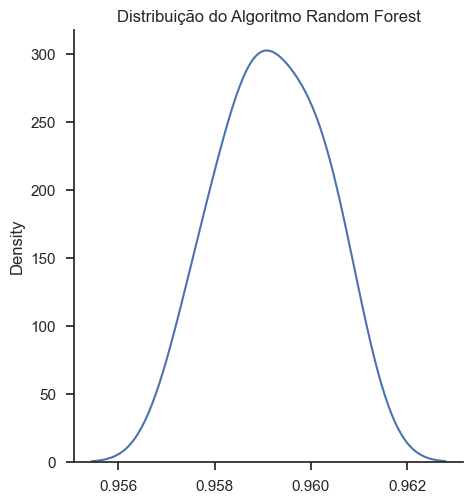

In [102]:
# Algorimo Random Forest
sns.displot(scores_random_scaler, kind='kde')
plt.title('Distribuição do Algoritmo Random Forest')
plt.show()

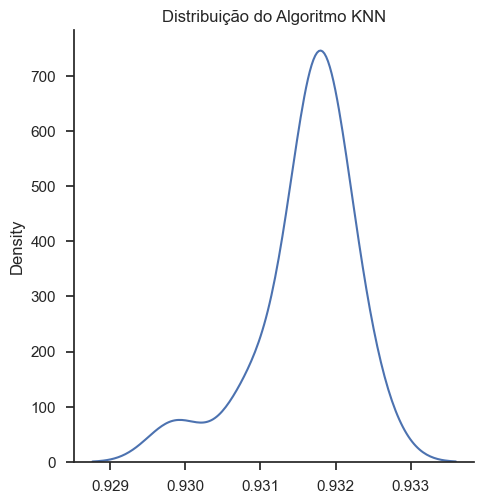

In [103]:
# Algoritmo KNN
sns.displot(scores_knn_scaler, kind = 'kde')
plt.title('Distribuição do Algoritmo KNN')
plt.show()

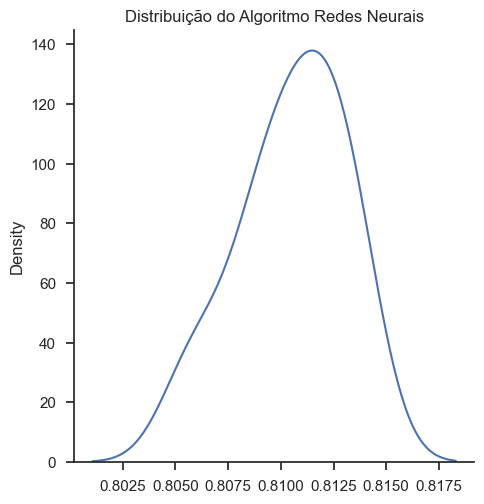

In [104]:
# Algoritmo Redes Neurais
sns.displot(scores_redes_scaler, kind = 'kde')
plt.title('Distribuição do Algoritmo Redes Neurais')
plt.show()

De acordo com o teste Shapiro, o algoritmo **KNN Scaler** não apresenta uma distribuição normal. No entanto, o gráfico indica uma aparência de normalidade, embora seja possível observar uma curva anterior à distribuição principal.  Levando isso em consideração, optaremos por utilizar este algoritmo, pois somente rejeitaríamos se não houvesse a forma característica de sino.

## Teste ANOVA

A Análise de Variância, conhecida como ANOVA, é uma técnica estatística que visa identificar se existem diferenças significantes entre as médias de três ou mais grupos independentes.

In [105]:
# Testando a hipótese nulo com nossos 3 algoritmos
from scipy.stats import f_oneway
p = f_oneway(scores_random_scaler,scores_redes_scaler)
print(p.pvalue)

2.5463535813472084e-46


In [106]:
# Verificando se aceitaremos a hipótese nula ou nao
alpha = 0.05

if  p.pvalue >= alpha:
    print('Hipotese nula aceita. Resultados são igual')
else:
    print('Hipotese nula rejeitada. Dados Diferentes')

Hipotese nula rejeitada. Dados Diferentes


In [107]:
# Criando umas tabela com a precisão
Accuracy = {'Algoritmo': ['Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest',
                          'KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN',
                          'Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais'],
            'Pontuação': np.concatenate([scores_random_scaler,scores_knn_scaler,scores_redes_scaler])}
Accuracy = pd.DataFrame(Accuracy)
Accuracy              

,Algoritmo,Pontuação
0,Random Forest,0.958182
1,Random Forest,0.958935
2,Random Forest,0.958181
3,Random Forest,0.960505
4,Random Forest,0.959751
5,Random Forest,0.960380
6,Random Forest,0.960945
7,Random Forest,0.957303
8,Random Forest,0.957742
9,Random Forest,0.958809


## Teste de Turkey

In [108]:
# Fazendo uma comparação multipla
from statsmodels.stats.multicomp import MultiComparison
comparação = MultiComparison(Accuracy['Pontuação'],Accuracy['Algoritmo'])

In [109]:
# Comparando
teste_tukey = comparação.tukeyhsd()
print(teste_tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
          KNN Random Forest   0.0276   0.0  0.0261   0.029   True
          KNN Redes Neurais  -0.1211   0.0 -0.1225 -0.1197   True
Random Forest Redes Neurais  -0.1487   0.0 -0.1501 -0.1472   True
-----------------------------------------------------------------


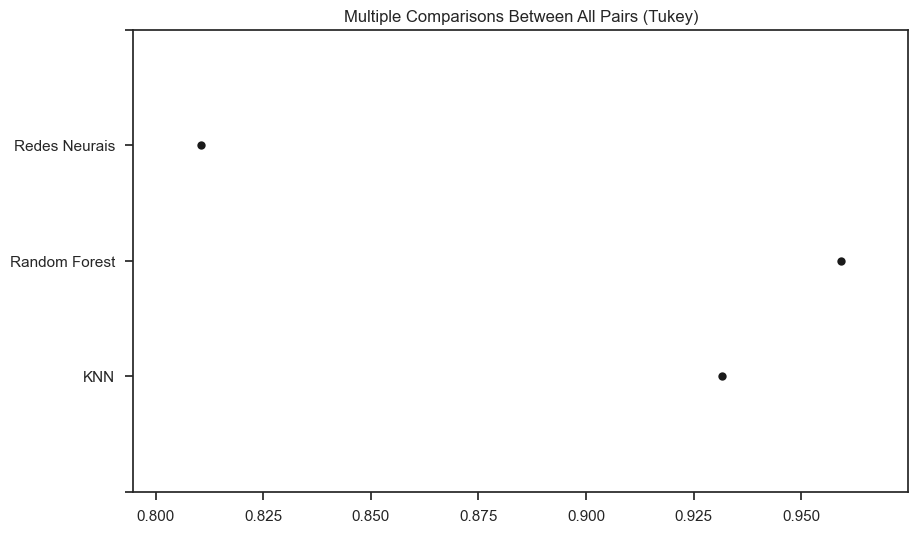

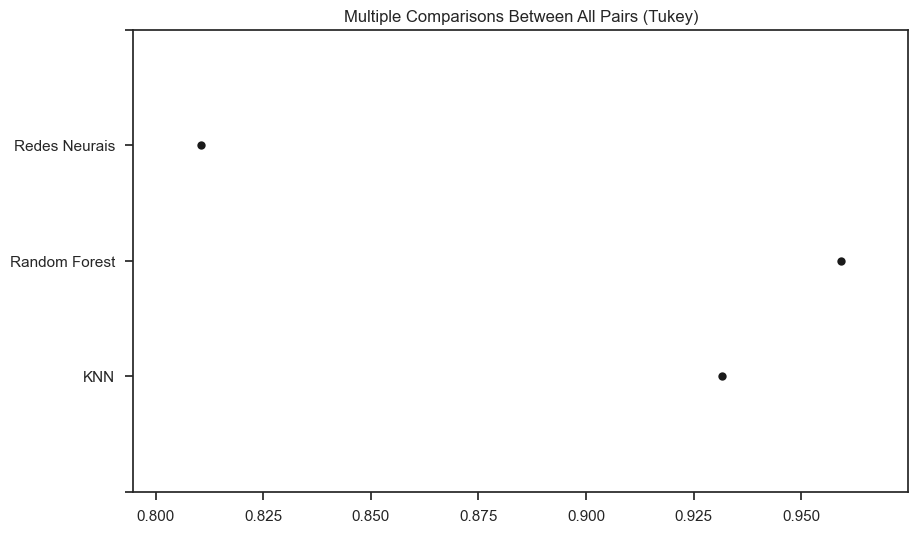

In [110]:
# Plotando gráfico de dispersão para verificarmos os algoritmos de acordo com a precisão
teste_tukey.plot_simultaneous()


De acordo com a análise de variância (ANOVA) e o Teste de Tukey, há diferenças significativas no desempenho dos algoritmos. O Random Forest demonstra superioridade em relação aos outros algoritmos.

## Combinação de classificadores

Neste momento, após a realização da avaliação e dos testes, a fim de aprimorar o desempenho do modelo, os três melhores algoritmos serão combinados para obter a previsão mais precisa possível.

In [111]:
# Criando um novo cliente hipotético (que sei que está em churn)
Novo_cliente = x_scaler[0]
Novo_cliente = Novo_cliente.reshape(1,-1)
Novo_cliente, Novo_cliente.shape

(array([[-0.29877723, -0.95773012, -1.01799435,  0.08418894, -1.01840607,
         -1.33103279, -0.75606167,  0.6512495 ,  1.08223556,  0.00817382]]),
 (1, 10))

In [112]:
# Aplicando os classificadores ao novo cliente
classificador_random = random_forest_scaler.predict(Novo_cliente)
classificador_knn = knn_scaler.predict(Novo_cliente)
classificador_redes = redes_neurais_scaler.predict(Novo_cliente)


In [113]:
# Verificando o resultado
classificador_random[0],classificador_knn[0], classificador_redes[0]

(1, 1, 1)

In [114]:
# Combinando os algoritmos afim de obter o melhor resultado
churn = 0
nao_churn =0

if classificador_random[0] == 1:
    churn +=1
else:
    nao_churn += 1
    
if classificador_knn[0] == 1:
    churn +=1
else:
    nao_churn += 1
    
if classificador_redes[0] == 1:
    churn +=1
else:
    nao_churn += 1

if churn > nao_churn:
    print('Cliente está em Churn')
else:
    print('Cliente não está em Churn')

Cliente está em Churn


# Conclusão

Em suma, o projeto foi concluído alcançando o objetivo principal de construir um algoritmo de Machine Learning capaz de classificar clientes em Churn ou não, permitindo identificar esses clientes para evitar prejuízos e implementar estratégias de retenção.

Resultados promissores foram obtidos com diversos algoritmos. Foram testados 5 algoritmos na base de dados, e os três melhores foram selecionados para combinação, buscando atingir a maior precisão possível. Testes estatísticos foram aplicados para avaliar e analisar esses algoritmos. Conclui-se que o algoritmo Random Forest é o mais eficaz para nossa base de dados, atingindo 94,12% de acurácia.

Ao aplicarmos este projeto na empresa, será possível prever se um cliente deixará de ser ativo, reduzindo a taxa de churn atual de 20,4%, recuperando clientes e aumentando a receita da empresa.